In [1]:
!pip install scikit-learn matplotlib torch

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [2]:
import torch

torch.manual_seed(1024)

In [3]:
x = torch.linspace(100, 300, 200)
x = (x - torch.mean(x)) / torch.std(x)
epsilon = torch.randn(x.shape)
y = 10 * x + 5 + epsilon

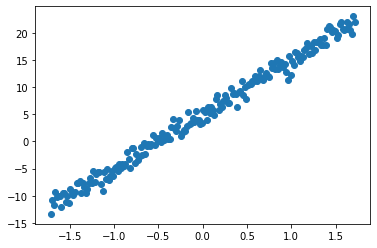

In [5]:
import matplotlib.pyplot as plt

plt.scatter(x, y)

In [7]:
from sklearn import linear_model

In [8]:
m = linear_model.LinearRegression()

In [9]:
m.fit(x.view(-1, 1), y)
m.coef_, m.intercept_

(array([9.934817], dtype=float32), 5.093296)

In [10]:
#### 梯度下降法

In [11]:
import torch.nn as nn

class Linear(nn.Module):
    
    def __init__(self):
        # 定义模型参数
        super().__init__()
        self.a = nn.Parameter(torch.zeros(()))
        self.b = nn.Parameter(torch.zeros(()))
    
    def forward(self, x):
        # 向前传播
        return self.a * x + self.b
        
    def string(self):
        return f'y = {self.a.item():.2f} * x + {self.b.item():.2f}'

In [13]:
m = Linear()
m(x)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.], grad_fn=<AddBackward0>)

In [14]:
list(m.parameters())

[Parameter containing:
 tensor(0., requires_grad=True),
 Parameter containing:
 tensor(0., requires_grad=True)]

In [15]:
import torch.optim as optim

learning_rate = 0.1
model = Linear()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

for t in range(20):
    y_pred = model(x)
    # 定义损失
    loss = (y - y_pred).pow(2).mean()
    optimizer.zero_grad()
    # 计算梯度
    loss.backward()
    # 更新模型参数
    optimizer.step()
    print(model.string())

y = 1.98 * x + 1.02
y = 3.56 * x + 1.83
y = 4.83 * x + 2.49
y = 5.85 * x + 3.01
y = 6.66 * x + 3.42
y = 7.31 * x + 3.76
y = 7.83 * x + 4.03
y = 8.25 * x + 4.24
y = 8.59 * x + 4.41
y = 8.85 * x + 4.55
y = 9.07 * x + 4.66
y = 9.24 * x + 4.74
y = 9.38 * x + 4.81
y = 9.49 * x + 4.87
y = 9.58 * x + 4.91
y = 9.65 * x + 4.95
y = 9.71 * x + 4.98
y = 9.75 * x + 5.00
y = 9.79 * x + 5.02
y = 9.82 * x + 5.03


In [17]:
learning_rate = 0.1
model = Linear()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

for t in range(20):
    y_pred = model(x)
    # 定义损失
    loss = (y - y_pred).pow(2).mean()
    # optimizer.zero_grad()
    # 计算梯度
    loss.backward()
    # 更新模型参数
    ## optimizer.step()
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad
            param.grad = None
    print(model.string())

y = 1.98 * x + 1.02
y = 3.56 * x + 1.83
y = 4.83 * x + 2.49
y = 5.85 * x + 3.01
y = 6.66 * x + 3.42
y = 7.31 * x + 3.76
y = 7.83 * x + 4.03
y = 8.25 * x + 4.24
y = 8.59 * x + 4.41
y = 8.85 * x + 4.55
y = 9.07 * x + 4.66
y = 9.24 * x + 4.74
y = 9.38 * x + 4.81
y = 9.49 * x + 4.87
y = 9.58 * x + 4.91
y = 9.65 * x + 4.95
y = 9.71 * x + 4.98
y = 9.75 * x + 5.00
y = 9.79 * x + 5.02
y = 9.82 * x + 5.03


In [19]:
### 随机梯度下降法
learning_rate = 0.1
batch_size = 20
model = Linear()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

for t in range(20):
    ix = (t * batch_size) % len(x)
    xx = x[ix: ix + batch_size]
    yy = y[ix: ix + batch_size]
    yy_pred = model(xx)
    # 定义损失
    loss = (yy - yy_pred).pow(2).mean()
    optimizer.zero_grad()
    # 计算梯度
    loss.backward()
    # 更新模型参数
    optimizer.step()
    print(model.string())

y = 3.12 * x + -1.99
y = 3.48 * x + -2.28
y = 3.22 * x + -1.97
y = 2.85 * x + -1.22
y = 2.68 * x + -0.23
y = 2.92 * x + 1.08
y = 3.74 * x + 2.61
y = 5.07 * x + 4.15
y = 6.73 * x + 5.52
y = 8.22 * x + 6.48
y = 9.36 * x + 5.75
y = 9.75 * x + 5.42
y = 9.88 * x + 5.28
y = 9.89 * x + 5.26
y = 9.89 * x + 5.20
y = 9.88 * x + 5.18
y = 9.88 * x + 5.17
y = 9.84 * x + 5.14
y = 9.86 * x + 5.15
y = 9.94 * x + 5.21


In [20]:
### 随机梯度下降法
learning_rate = 1
batch_size = 20
model = Linear()
optimizer = optim.AdamW(model.parameters(), lr=learning_rate)

for t in range(20):
    ix = (t * batch_size) % len(x)
    xx = x[ix: ix + batch_size]
    yy = y[ix: ix + batch_size]
    yy_pred = model(xx)
    # 定义损失
    loss = (yy - yy_pred).pow(2).mean()
    optimizer.zero_grad()
    # 计算梯度
    loss.backward()
    # 更新模型参数
    optimizer.step()
    print(model.string())

y = 1.00 * x + -1.00
y = 1.89 * x + -1.92
y = 2.57 * x + -2.63
y = 3.04 * x + -2.97
y = 3.40 * x + -2.94
y = 3.74 * x + -2.62
y = 4.19 * x + -2.09
y = 4.76 * x + -1.44
y = 5.44 * x + -0.70
y = 6.19 * x + 0.10
y = 6.87 * x + 0.81
y = 7.46 * x + 1.44
y = 7.96 * x + 2.02
y = 8.38 * x + 2.57
y = 8.75 * x + 3.10
y = 9.08 * x + 3.61
y = 9.38 * x + 4.09
y = 9.66 * x + 4.54
y = 9.91 * x + 4.96
y = 10.15 * x + 5.33


In [21]:
#### 张量的基本操作

In [22]:
torch.zeros(2, 3)

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [23]:
torch.randn(4, 2)

tensor([[ 1.9050,  0.1757],
        [ 1.2764,  0.6187],
        [ 3.2715,  0.6103],
        [-1.1903,  1.0333]])

In [24]:
a = torch.randn(2, 3, 4)
a.shape

torch.Size([2, 3, 4])

In [25]:
a.unsqueeze(0).shape

torch.Size([1, 2, 3, 4])

In [26]:
b = a.unsqueeze(0)
b

tensor([[[[ 0.6836, -0.8168,  0.0590, -1.3575],
          [ 2.8567,  1.0398, -0.6034,  0.3212],
          [-0.6649,  0.0157, -1.1210,  0.5838]],

         [[-0.3839, -0.6906,  1.4496, -0.3944],
          [ 0.7254, -1.0734,  0.9207,  0.6957],
          [ 0.0532,  1.7621,  0.2933,  2.3150]]]])

In [27]:
b.shape

torch.Size([1, 2, 3, 4])

In [29]:
b.squeeze(0).shape

torch.Size([2, 3, 4])

In [31]:
b.squeeze(1).shape

torch.Size([1, 2, 3, 4])

In [34]:
data = torch.tensor(range(0, 10))
data.shape

torch.Size([10])

In [35]:
data.view(2, 5).shape

torch.Size([2, 5])

In [37]:
data.view(5, -1).shape

torch.Size([5, 2])

In [38]:
d1 = data.view(2, 5)
t1 = d1.T

In [39]:
d1.view(1, 10).shape

torch.Size([1, 10])

In [40]:
t1.view(1, 10).shape

RuntimeError: view size is not compatible with input tensor's size and stride (at least one dimension spans across two contiguous subspaces). Use .reshape(...) instead.

In [42]:
t1.reshape(1, 10), d1.view(1, 10)

(tensor([[0, 5, 1, 6, 2, 7, 3, 8, 4, 9]]),
 tensor([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]))

In [43]:
a = torch.tensor(range(1, 7)).view(2, 3)
b = torch.tensor(range(11, 17)).view(2, 3)
a.shape, b.shape

(torch.Size([2, 3]), torch.Size([2, 3]))

In [44]:
a, b, a * b

(tensor([[1, 2, 3],
         [4, 5, 6]]),
 tensor([[11, 12, 13],
         [14, 15, 16]]),
 tensor([[11, 24, 39],
         [56, 75, 96]]))

In [45]:
b = torch.tensor(range(1, 4)).view(3)
b.shape

torch.Size([3])

In [46]:
a   # (2, 3)
b   # (   3)
a * b

tensor([[ 1,  4,  9],
        [ 4, 10, 18]])

In [47]:
mat1 = torch.randn(3, 4)
mat2 = torch.randn(4, 5)
(mat1 @ mat2).shape

torch.Size([3, 5])

In [48]:
mat1 = torch.randn(5, 1, 3, 4)  # (5, 1, 3, 4)
mat2 = torch.randn(8, 4, 5)     # (   8, 4, 5)
(mat1 @ mat2).shape             # (5, 8, 3, 5)

torch.Size([5, 8, 3, 5])